# [동전](https://www.acmicpc.net/problem/2293)

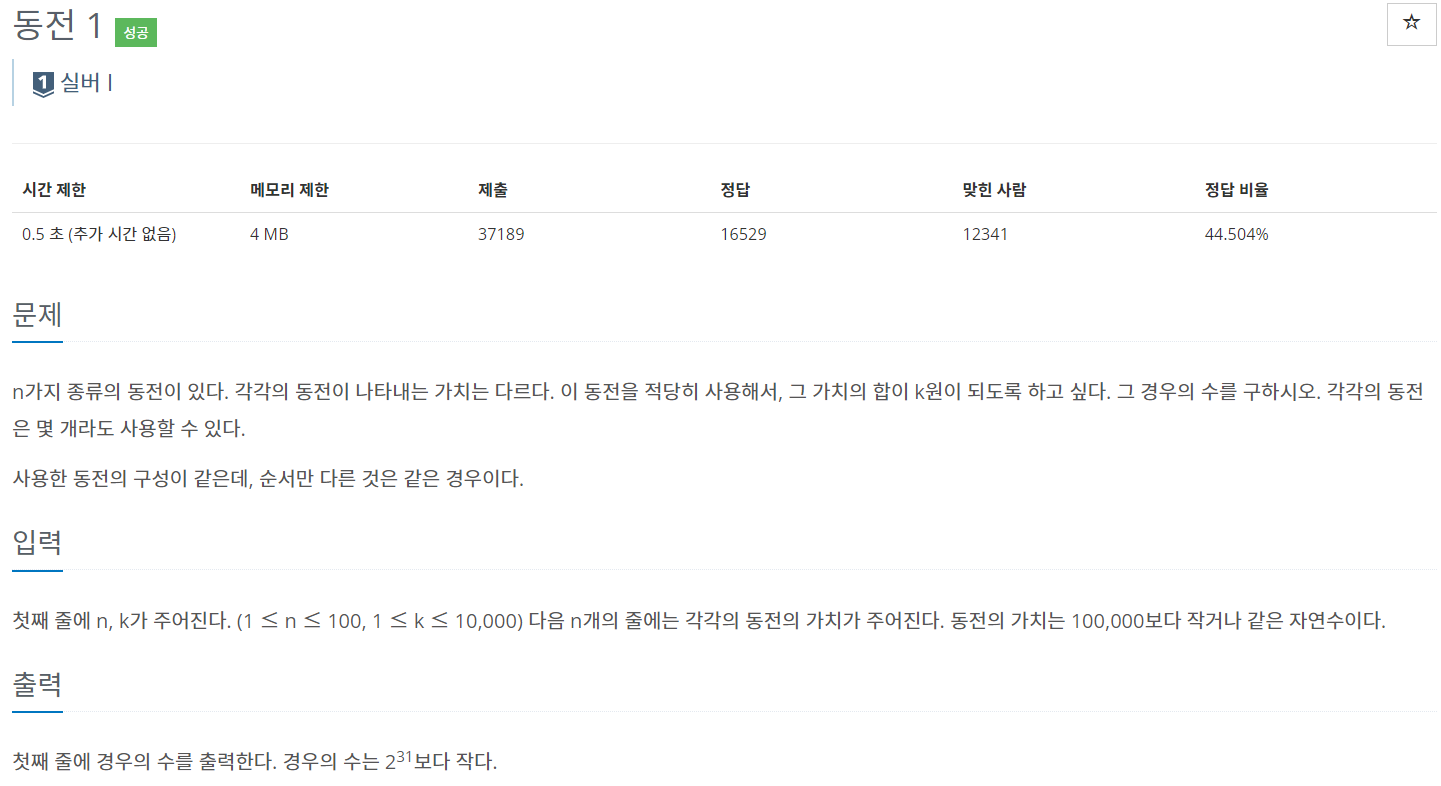

![](./image/2293.png)

In [ ]:
import sys

input = sys.stdin.readline
N, K = map(int, input().split())
dp = [0]*(K+1) # i 가치가 될 수 있는 동전의 조합
coin = []
dp[0] = 1
for i in range(N):
    number = int(input())
    coin.append(number)

coin.sort()  # 동전이 반드시 크기 순으로 들어온다는 말이 없어서 크기 순 정렬
for c in coin: # 모든 동전의 가치가 다르다고 문제의 조건에 주어져 있으므로 전부 다 다름
    for i in range(c, K+1):
        dp[i] += dp[i-c] # i 가치는 i-c가치에서 c동전을 더해서 만들어질 수 있음.

print(dp[K])

In [ ]:
'''
이차원 dp 공간 복잡도 O(NK) -> 메모리 초과

N, K = map(int, input().split())
dp = [[0]*N for _ in range(K+1)]
coin = []
for i in range(N):
    number = int(input())
    coin.append(number)

coin.sort()  # 동전이 반드시 크기 순으로 들어온다는 말이 없어서 크기 순 정렬
for i in range(N):  # 초기화
    dp[coin[i]][i] = 1

for num in range(1, K+1):  # 숫자 배열 내림차순이라고 생각할 것 111, 21 다음에는 1이 올 수 있지만, 1 다음에는 2가 올 수 없도록
    # 가장 작은 동전은 앞선 수의 모든 숫자 뒤에 붙을 수 있다.
    # 현재 숫자 num 에서 dp[num-coin][coin, coin2, coin3, .... ] 즉 전체 sum
    # 그 다음으로 작은 숫자 coin2는 coin으로 끝나는 경우를 제외한 숫자들 뒤에 붙을 수 있다.
    # dp[num-coin2][coin2 ~ ]
    # 모든 동전이 이 규칙을 따르기 때문에
    # 매 동전마다 같은 sum을 반복하는 것보다는 (가장 큰 동전으로 끝나는 경우는 총 n번의 sum에 호출된다.)
    # 미리 누적합을 구해놓는 것이 편하다.
    # coin자리에는 coin보다 큰 가치의 동전으로 끝나는 경우들의 합
    # coin2자리에는 coin을 제외하고 coin2보다 큰 가치의 동전들로 끝나는 경우들의 합
    for i in range(N-1, -1, -1):  # 가장 가치가 큰 동전부터 해결 -> 역순으로 누적합을 하기 위해
        temp = num-coin[i]
        if temp > 0:
            if i == N-1:
                # num-coin 에서 i동전보다 같거나 더 큰 동전들로 끝나는 모든 합을 더해줌
                dp[num][i] += dp[temp][i]
            else:
                dp[num][i] += dp[temp][i] + dp[num][i+1]  # 다음 계산을 쉽게 하기 위한 누적합까지

print(dp[K][0])
'''